# MNIST Project in FastAI

Here, we will predict MNIST digits using FastAI. Then, we will go deeper and figure out what's happening behind the scenes.

In [ ]:
from fastai.vision.all import *
from fastbook import *

In [ ]:
path = untar_data(URLs.MNIST)
Path.BASE_PATH = path
path.ls()

(#2) [Path('training'),Path('testing')]

In [ ]:
(path/'training').ls()

(#10) [Path('training/7'),Path('training/8'),Path('training/5'),Path('training/6'),Path('training/9'),Path('training/3'),Path('training/2'),Path('training/0'),Path('training/4'),Path('training/1')]

Using fastai, it is very easy to train. We make a `DataBlock` with information on how to get labels, grab images, and split train/valid data. 

In [ ]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    get_y=parent_label,
    splitter=RandomSplitter(),
)
dls = dblock.dataloaders(path)

Then, we take a look at it, and it looks like labels are correctly assigned to each image.

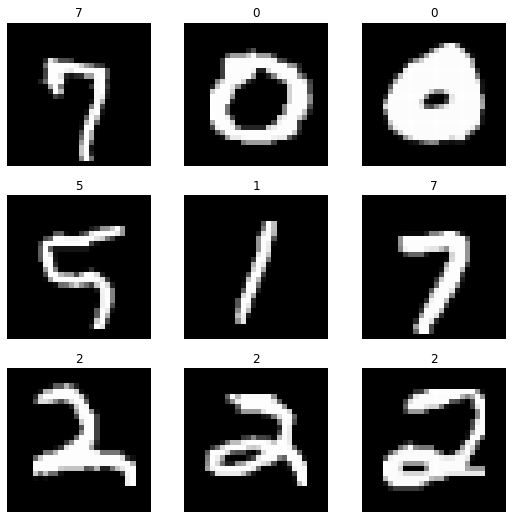

In [ ]:
dls.show_batch()

We create a learner with resnet18, so we can use transfer learning. Then, we find the learning rate.

/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


SuggestedLRs(valley=0.0010000000474974513)

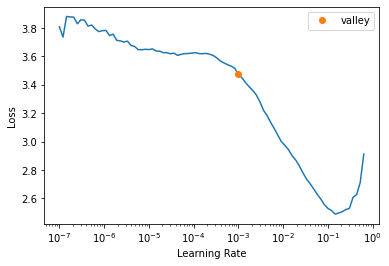

In [ ]:
learn = vision_learner(dls, arch=resnet18, metrics=accuracy)
learn.lr_find()

Although fastai suggests a learning rate suitable to use, I can use a little bit bigger learning rate. I can probably use 0.01 even if 0.001 is suggested.

In [ ]:
learn.fine_tune(3, 0.01)

epoch,train_loss,valid_loss,accuracy,time
0,0.383465,0.211662,0.934286,00:46


epoch,train_loss,valid_loss,accuracy,time
0,0.134975,0.076517,0.978714,00:59
1,0.030738,0.033497,0.991071,00:59
2,0.019911,0.024113,0.993071,00:59


Training was very easy with almost perfect accuracy thanks to fastai. However, it is fun to dive deeper and figure out what's going on under the hood.